<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Proyecto 1</p></tp>
            <tp><p style="font-size:150%;text-align:center">Conecta 4 </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo

El objetivo del siguiente notebook es, mostrarle al lector la implementacion del conocido juego conecta-4 mediante lo visto en la clase de inteligencia artificial,es decir, busqueda en estado de espacios, algoritmos de busqueda, utilidad y mucho mas. Ademas, mostraremos el analisis que hicimos al comparar los algoritmos de busqueda "minimax" y "poda alfa-beta". 

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Explicacion del juego](attachment:./#rumania).
* [Estrategia de búsqueda](attachment:./#uniform).

Antes de iniciar con la parte de programacion y lo formal, empecemos con la pregunta ¿Que es conecta-4? 

A pesar de ser un juego conocido, nos gustaria explicarlo (si el lector ya sabe de que se trata puede saltarse esta parte)

**Conecta-4**: Juego de mesa para dos jugadores, creado en 1974, distribuido por Hasbro y ahora con versiones online. Consiste en que cada jugador tiene 21 fichas de un color (amarillas o rojas) y el jugador ganador es el cual logre de primeras poner cuatro de estas fichas del mismo color en linea (horizontal, vertical o culaquiera de las diagonales) en el tablero. el tablero original o mas comun es el de 7x6. El juego luce de la siguiente manera:

Vamos a iniciar definiendo el problema.

* **Estado inicial**: Tablero de 7x6 vacio, inicio de juego.

* **a_jugar(s):** Define el jugador en turno, es decir, si el jugador que tiene las fichas rojas o el jugador con las fichas amarillas.

* **acciones(s):** Son las posibles acciones que el jugador puede realizar segun a_jugar(s) en el estado s. El jugador en turno ubica una ficha en una posicion.

* **resultado(s, a):** Describe el entorno el cual resulta de la accion que haya hecho el jugador.

* **es_terminal(s):** Determina si el juego ya finalizo y se obtiene el estado.

* **utilidad(s, j):** Es una funcion definida para los es_terminal(s), establece la utilidad que se obtiene despues de que el jugador j, jugara. En nuestro caso, si el ganador es el rojo la utilidad es -1, 1 de lo contrario (amarillo), y como siempre, si hay empate es 0.

## Pruebas de funcionamiento

debido a que el tablero es muy grande, el algoritmo de poda alfa-beta se demoraba demasiado tiempo en encontrar un movimiento desde el estado inicial. De modo que, generamos tableros aleatorios despues de n jugadas.

In [1]:
from ambientes import *
from random import choice

juego = Conecta_4()
s = juego.estado_inicial


declaramos un estado inicial el cual no es terminal pero el tablero esta casi completo, esto con el fin de comprobar el funcionamiento de los estados terminales, y, el algoritmo poda alfa-beta

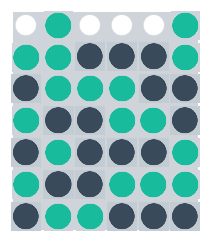

In [2]:
s = np.matrix("0 2 0 0 0 2; 2 2 1 1 1 2; 1 2 2 2 1 1; 2 1 1 2 2 1; 1 2 1 1 1 2; 2 1 1 2 2 2; 1 2 2 1 1 1")
juego.pintar_estado(s)


In [6]:
print("El estado es terminal: ", juego.es_terminal(s))
print("Posiciones posibles de juego: ", juego.acciones(s))

El estado es terminal:  False
Posiciones posibles de juego:  [(4, 0), (3, 0), (2, 0), (0, 0)]


Es turno de las fichas verdes, vamos a dejar que el algoritmo alfa-beta escoja la mejor opcion para mover, como se vio anteriormente, tiene 4 acciones posibles, el movimiento esperado seria en (0,0), de ese modo, las fichas verdes ganarian el juego

El computador jugo en:  (0, 0)


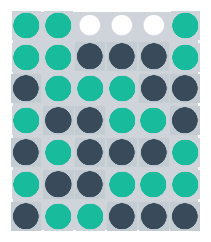

Es terminal es estado actual:  True


In [23]:
s = np.matrix("0 2 0 0 0 2; 2 2 1 1 1 2; 1 2 2 2 1 1; 2 1 1 2 2 1; 1 2 1 1 1 2; 2 1 1 2 2 2; 1 2 2 1 1 1")

jugada_pc = poda_alpha_beta(juego,s)
print("El computador jugo en: ", jugada_pc)


s = juego.resultado(s, jugada_pc)


juego.pintar_estado(s)
print("Es terminal es estado actual: ", juego.es_terminal(s)) 


Funciono! entre las 4 acciones el algoritmo elige la que maximiza su funcion de costo, haciendo que las fichas verdes ganen, ademas, el algoritmo tiene un comportamiento determinista (no es suerte que haya escogido esa casilla) siempre que se corre el codigo, el output es (0,0)

## Un caso mas general

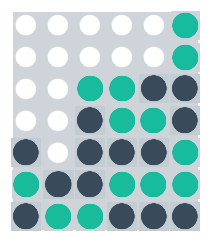

In [39]:
s = np.matrix("0 0 0 0 0 2; 0 0 0 0 0 2; 0 0 2 2 1 1; 0 0 1 2 2 1; 1 0 1 1 1 2; 2 1 1 2 2 2; 1 2 2 1 1 1")

juego.pintar_estado(s)

Las verdes estan apunto de perder, la unica opcion para seguir jugando es que coloquen la ficha en la posicion (1,4), vamos a ver que hace el computador: 

El computador jugo en:  (1, 4)


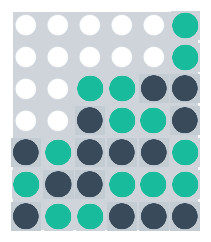

In [41]:
s = np.matrix("0 0 0 0 0 2; 0 0 0 0 0 2; 0 0 2 2 1 1; 0 0 1 2 2 1; 1 0 1 1 1 2; 2 1 1 2 2 2; 1 2 2 1 1 1")

# El computador juega por las verdes
jugada_pc = poda_alpha_beta(juego,s)
print("El computador jugo en: ", jugada_pc)


s = juego.resultado(s, jugada_pc)

juego.pintar_estado(s)

Como se vio en el ejemplo anterior, el computador logro escoger la casilla correcta para no perder.

# A jugar!

El siguiente codigo genera un tablero aleatorio con n jugadas realizadas.

Nota: notese que el algoritmo para crear un tablero inicial es un algoritmo aleatorio, si n tiende a 42, lo mas probable es que el algoritmo nunca encuentre un estado no terminal.

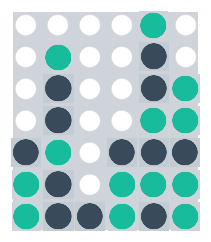

In [7]:
n = 25 # Numero de jugadas, tiene que ser un numero par

s = juego.estado_inicial
for i in range(n):
    a = choice(juego.acciones(s))
    s = juego.resultado(s,a)

while juego.es_terminal(s):
    s = juego.estado_inicial
    for i in range(n):
        a = choice(juego.acciones(s))
        s = juego.resultado(s,a)

juego.pintar_estado(s)

s1 = s 



In [96]:
s1 = s # Correr esta linea si se quiere reiniciar el juego con el tablero anterior

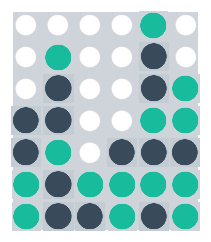

Juego terminado. Ganan las verdes


In [8]:
# la jugada de las fichas verdes es la del computador.

a = (0,3)

assert(a in juego.acciones(s1)), 'Acción no permitida. Intente de nuevo.'

###################
s1 = juego.resultado(s1, a)
juego.pintar_estado(s1)


if not juego.es_terminal(s1):
    a = poda_alpha_beta(juego, s1)
    print("El computador jugo en: ", a)
    s1 = juego.resultado(s1, a)
    sleep(1)
    clear_output(wait=True)
    juego.pintar_estado(s1)
    
    if juego.es_terminal(s1):
        print('Juego terminado. Ganan las verdes')
else:
    jugador = juego.a_jugar(s1)
    if juego.utilidad(s1, jugador)==0:
        print('Juego terminado. ¡Empate!')
    else:
        print('Juego terminado. ganan las azules')

## Conclusiones

* El algoritmo de busqueda es muy malo para problemas con muchas posibilidades, como es el caso de nuestro tablero, un tablero de 7x6 significa muchas posibilidades de juego lo cual el computador no era capaz de calcular en un tiempo prudente (en nuestro caso, el algoritmo duro mas de 2 horas corriendo y no arrojo ningun resultado)

* Para obtener resultados correctos, debemos acotar el problema, para esto, creamos tableros aleatorios con n juagadas, de esta manera el algoritmo tenia un punto de partida con menos posibilidades y encontraba el resultados mas rapido.

* El algoritmo de poda alfa-beta fue el unico que logro correr nuestro problema, el minmax no fue capaz de reslover el 

## Bibliografia

S. Russell and P. Norvig, Articial Intelligence: A Modern Approach. Pearson Education Limited,
2016.
